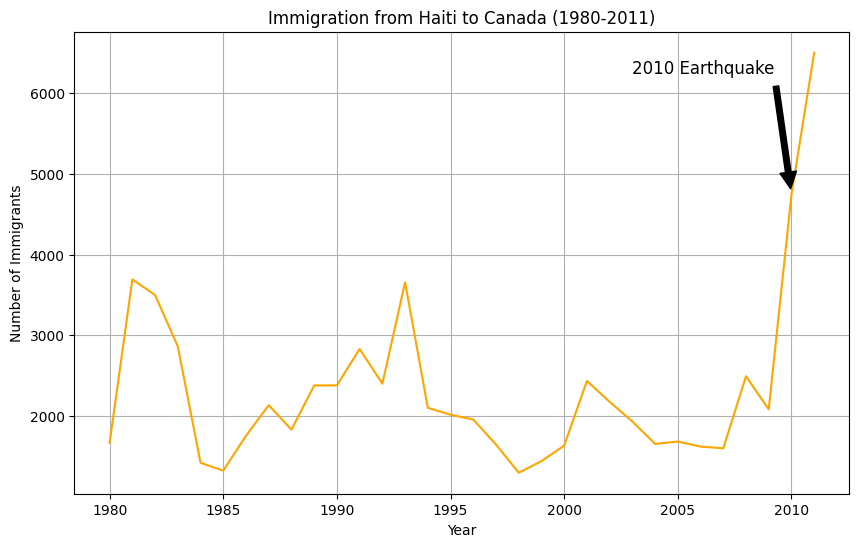

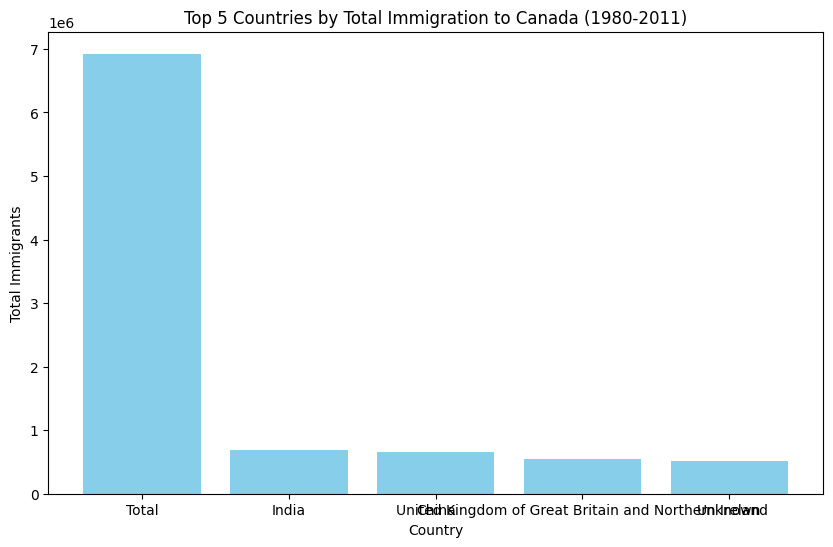

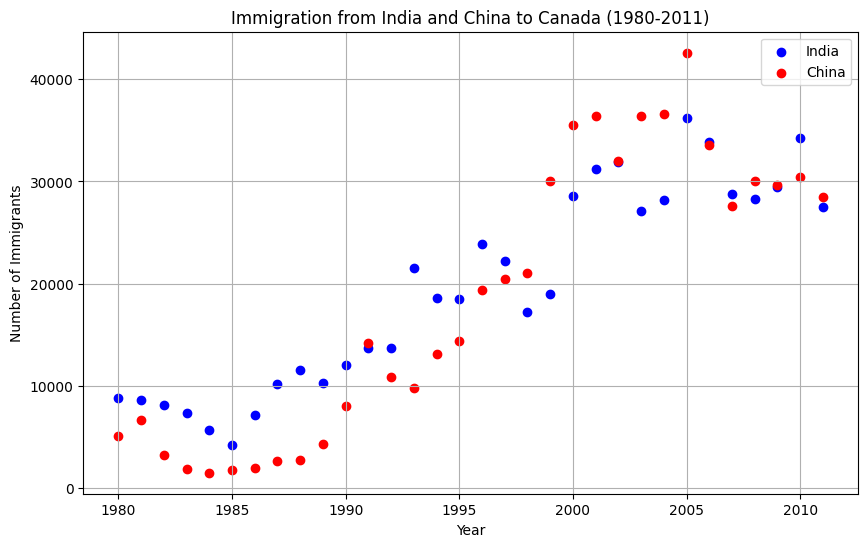

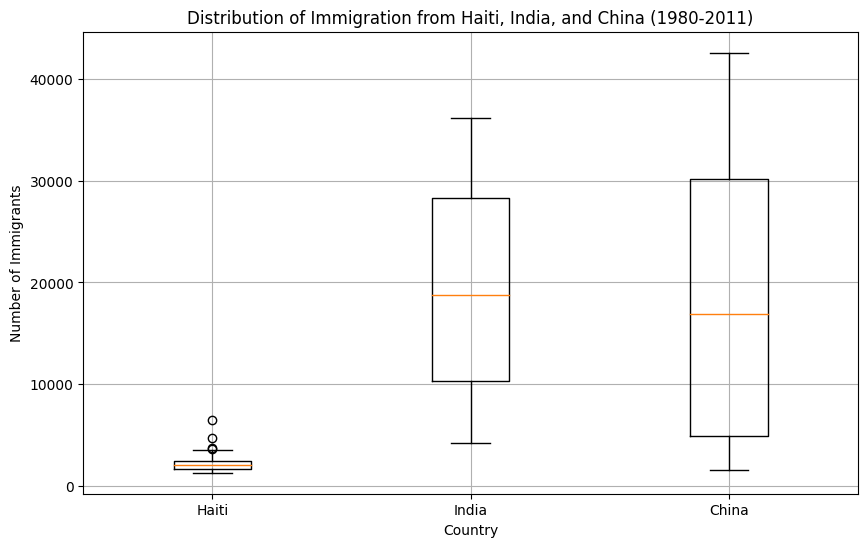

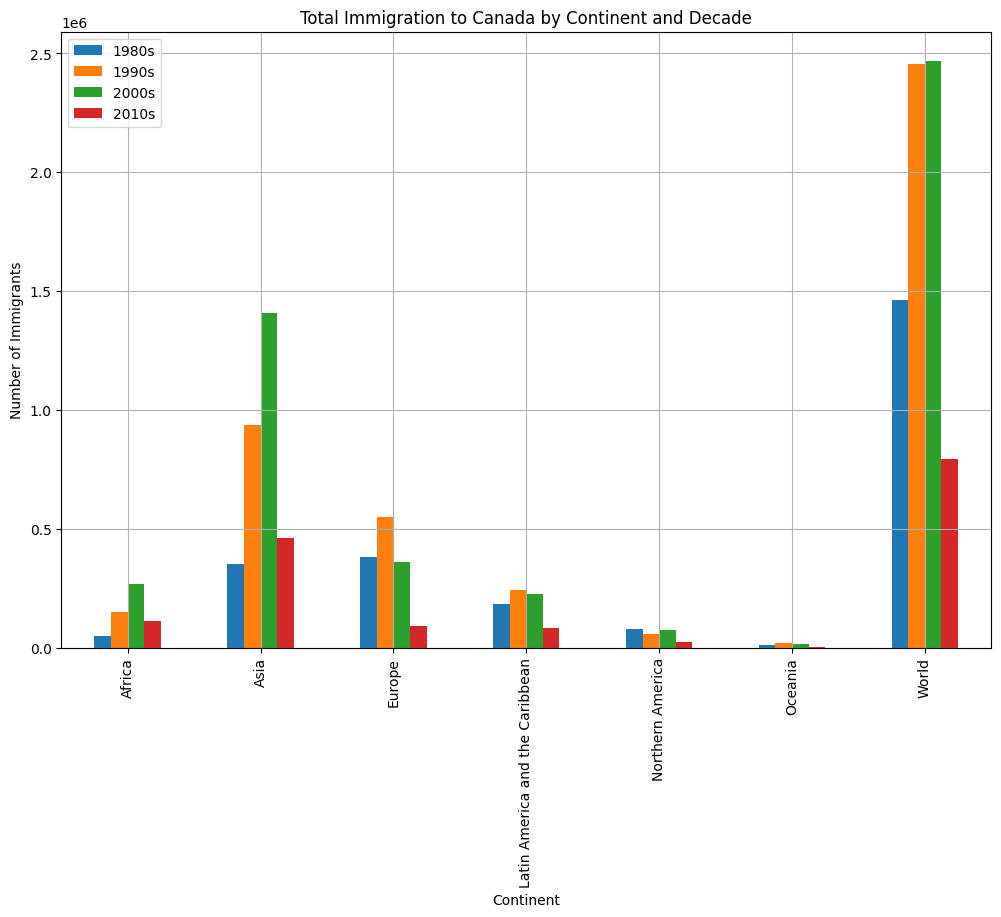

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
file_path = 'Canada.xlsx'
df = pd.read_excel(file_path, skiprows=20)
# Add a 'Total' column that sums the migration numbers for each country across all
df['Total'] = df.loc[:, 1980:2013].sum(axis=1)
# 1. Line Plot: Immigration Trends Over Time (Haiti)
haiti_data = df[df['OdName'] == 'Haiti']
years = list(range(1980, 2012))
haiti_immigrants = haiti_data.loc[:, 1980:2011].values.flatten() # flattening the 2D to 1D array

plt.figure(figsize=(10, 6))
plt.plot(years, haiti_immigrants, linestyle='-', color='orange')
plt.title('Immigration from Haiti to Canada (1980-2011)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.grid(True)

# Annotate the 2010 earthquake
# we use annotation to point the data point on the plot by specifying the cordinates
plt.annotate('2010 Earthquake',
xy=(2010, haiti_immigrants[years.index(2010)]),
xytext=(2003, haiti_immigrants[years.index(2010)] + 1500),
arrowprops=dict(facecolor='black', shrink=0.05),
fontsize=12)
plt.show()

# 2. Bar Plot: Comparing Immigration from Top 5 Countries
top_5_countries = df.nlargest(5, 'Total')[['OdName', 'Total']]
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries['OdName'], top_5_countries['Total'], color='skyblue')
plt.title('Top 5 Countries by Total Immigration to Canada (1980-2011)')
plt.xlabel('Country')
plt.ylabel('Total Immigrants')
plt.show()

# 3. Scatter Plot: Relationship Between Immigration and Year (India vs. China)
india_data = df[df['OdName'] == 'India']
china_data = df[df['OdName'] == 'China']
years = list(range(1980, 2012))
india_immigrants = india_data.loc[:, 1980:2011].values.flatten()
china_immigrants = china_data.loc[:, 1980:2011].values.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(years, india_immigrants, color='blue', label='India')
plt.scatter(years, china_immigrants, color='red', label='China')
plt.title('Immigration from India and China to Canada (1980-2011)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.legend()
plt.grid(True)
plt.show()

# 4. Box Plot: Distribution of Immigration Data (Haiti, India, China)
countries_data = df[df['OdName'].isin(['Haiti', 'India', 'China'])]
years_data = countries_data.loc[:, 1980:2011]
plt.figure(figsize=(10, 6))
plt.boxplot([years_data.loc[countries_data['OdName'] == country].values.flatten() for
country in ['Haiti', 'India', 'China']],
labels=['Haiti', 'India', 'China'])
plt.title('Distribution of Immigration from Haiti, India, and China (1980-2011)')
plt.xlabel('Country')
plt.ylabel('Number of Immigrants')
plt.grid(True)
plt.show()


# 5. Grouped Bar Plot: Total Immigration by Continent in Each Decade
decades = {
'1980s': list(range(1980, 1990)),
'1990s': list(range(1990, 2000)),
'2000s': list(range(2000, 2010)),
'2010s': list(range(2010, 2013))
}
continent_totals = {}
#combining all the data based on continents.
for decade, years in decades.items():
  continent_totals[decade] = df.groupby('AreaName')[years].sum().sum(axis=1)
continent_totals_df = pd.DataFrame(continent_totals)
# Plotting the grouped bar plot
continent_totals_df.plot(kind='bar', figsize=(12, 8))
plt.title('Total Immigration to Canada by Continent and Decade')
plt.xlabel('Continent')
plt.ylabel('Number of Immigrants')
plt.grid(True)
plt.show()